In [ ]:
mkdir /content/data

mkdir: cannot create directory ‘/content/data’: File exists


In [ ]:
cd /content/data

/content/data


dataフォルダに「digits.csv」をアップロード

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 分類のためのモジュールをインポート
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.preprocessing import StandardScaler

import pickle

In [ ]:
# 学習評価用関数
def learn(x, t, model):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)
    # 学習
    model.fit(x_train, y_train)
    # 訓練データと検証データの正解率計算
    train_score = model.score(x_train, y_train)
    val_score = model.score(x_val, y_val)
    return train_score, val_score


# グラフ表示関数
def plot_progress(data, title):
  tmp = pd.DataFrame(data)
  tmp.plot.line(x=tmp.columns[0], style=['r.-', 'bo-'], title=title)

In [ ]:
df0 = pd.read_csv('digits.csv')


In [ ]:
# 正解データの列名
t_col = 'target'

# 特徴量データの列名
x_col = df0.loc[:, 'pixel_0_0':'pixel_7_7'].columns
x_col

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [ ]:
df0.head()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,0,5,13,9,1,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,1,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,2,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,3,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
4,4,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [ ]:
df0.tail()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,1792,0,0,4,10,13,6,0,0,0,...,0,0,0,2,14,15,9,0,0,9
1793,1793,0,0,6,16,13,11,1,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,1794,0,0,1,11,15,1,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,1795,0,0,2,10,7,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9
1796,1796,0,0,10,14,8,1,0,0,0,...,0,0,1,8,12,14,12,1,0,8


「Unnamed: 0」列は不要なインデックスなので、削除

In [ ]:
df0 = df0.drop(['Unnamed: 0'], axis=1)
df0.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [ ]:
# 欠損値の確認
print(df0.isnull().sum().sum())

0


欠損値はないことがわかった

画像データとして表示をする

[[[0, 0, 5, 13, 9, 1, 0, 0], [0, 0, 13, 15, 10, 15, 5, 0], [0, 3, 15, 2, 0, 11, 8, 0], [0, 4, 12, 0, 0, 8, 8, 0], [0, 5, 8, 0, 0, 9, 8, 0], [0, 4, 11, 0, 1, 12, 7, 0], [0, 2, 14, 5, 10, 12, 0, 0], [0, 0, 6, 13, 10, 0, 0, 0]], [[0, 0, 0, 12, 13, 5, 0, 0], [0, 0, 0, 11, 16, 9, 0, 0], [0, 0, 3, 15, 16, 6, 0, 0], [0, 7, 15, 16, 16, 2, 0, 0], [0, 0, 1, 16, 16, 3, 0, 0], [0, 0, 1, 16, 16, 6, 0, 0], [0, 0, 1, 16, 16, 6, 0, 0], [0, 0, 0, 11, 16, 10, 0, 0]], [[0, 0, 0, 4, 15, 12, 0, 0], [0, 0, 3, 16, 15, 14, 0, 0], [0, 0, 8, 13, 8, 16, 0, 0], [0, 0, 1, 6, 15, 11, 0, 0], [0, 1, 8, 13, 15, 1, 0, 0], [0, 9, 16, 16, 5, 0, 0, 0], [0, 3, 13, 16, 16, 11, 5, 0], [0, 0, 0, 3, 11, 16, 9, 0]], [[0, 0, 7, 15, 13, 1, 0, 0], [0, 8, 13, 6, 15, 4, 0, 0], [0, 2, 1, 13, 13, 0, 0, 0], [0, 0, 2, 15, 11, 1, 0, 0], [0, 0, 0, 1, 12, 12, 1, 0], [0, 0, 0, 0, 1, 10, 8, 0], [0, 0, 8, 4, 5, 14, 9, 0], [0, 0, 7, 13, 13, 9, 0, 0]], [[0, 0, 0, 1, 11, 0, 0, 0], [0, 0, 0, 7, 8, 0, 0, 0], [0, 0, 1, 13, 6, 2, 2, 0], [0, 0, 7, 15

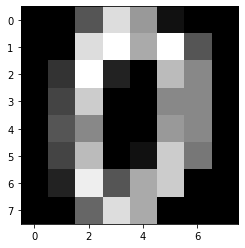

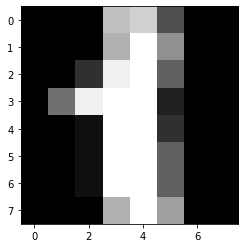

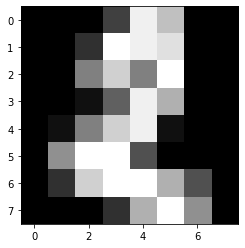

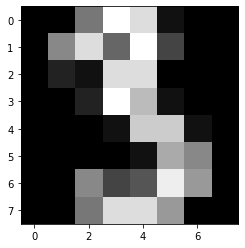

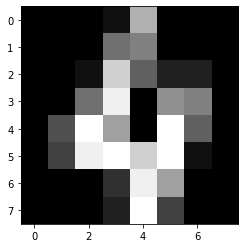

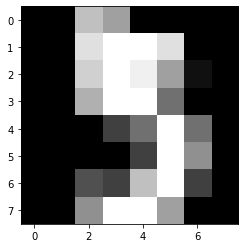

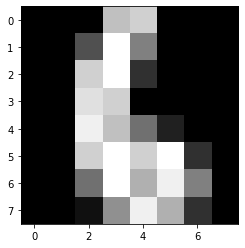

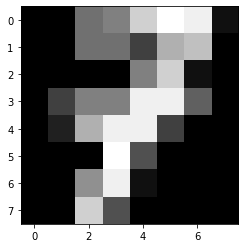

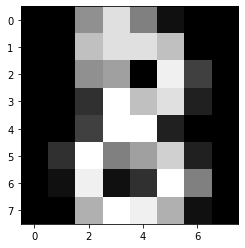

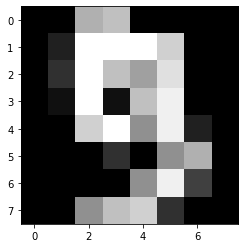

In [ ]:
# 省スペースの為、先頭10件のみ表示する

# tmp[画像番号][行][列]となるように再配置
tmp = [[list(df0.loc[i, x_col[j*8]:x_col[(j+1)*8-1]]) for j in range(8)] for i in range(10)]
print(tmp)

for i in range(10):
  plt.imshow(tmp[i], cmap='gray')
  plt.show()

学習開始

In [ ]:
# 訓練データ・検証データ、テストデータに分割
train_val, test = train_test_split(df0, test_size = 0.2, random_state = 0)
x_train = train_val.loc[:, x_col]
y_train = train_val.loc[:, [t_col]]

In [ ]:
# 不均衡データの確認（割合で表示する）
y_train.value_counts() / len(y_train)

target
3         0.107168
0         0.105080
4         0.105080
1         0.102296
5         0.098817
2         0.098121
7         0.097425
9         0.096729
6         0.095338
8         0.093946
dtype: float64

データの偏りはないと考える

max_depth:  1 ... x_score: 0.209, t_score: 0.208
max_depth:  2 ... x_score: 0.331, t_score: 0.281
max_depth:  3 ... x_score: 0.493, t_score: 0.451
max_depth:  4 ... x_score: 0.612, t_score: 0.549
max_depth:  5 ... x_score: 0.758, t_score: 0.715
max_depth:  6 ... x_score: 0.836, t_score: 0.750
max_depth:  7 ... x_score: 0.904, t_score: 0.809
max_depth:  8 ... x_score: 0.933, t_score: 0.844
max_depth:  9 ... x_score: 0.963, t_score: 0.844
max_depth: 10 ... x_score: 0.977, t_score: 0.847
max_depth: 11 ... x_score: 0.989, t_score: 0.854
max_depth: 12 ... x_score: 0.998, t_score: 0.840
max_depth: 13 ... x_score: 1.000, t_score: 0.840
max_depth: 14 ... x_score: 1.000, t_score: 0.840
max_depth: 15 ... x_score: 1.000, t_score: 0.840
max_depth: 16 ... x_score: 1.000, t_score: 0.840
max_depth: 17 ... x_score: 1.000, t_score: 0.840
max_depth: 18 ... x_score: 1.000, t_score: 0.840
max_depth: 19 ... x_score: 1.000, t_score: 0.840
max_depth: 20 ... x_score: 1.000, t_score: 0.840

max_depth = 11で、正解率

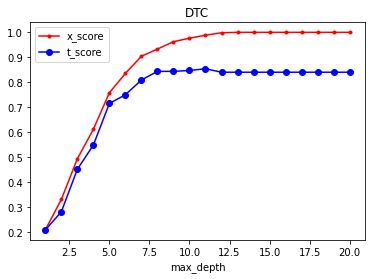

In [ ]:
# DecisionTreeClassfierで分類
max_score = 0
DTC_model = None
max_depth = 0
DTC_scores = []

num=20
for i in range(num):
  model = DecisionTreeClassifier(max_depth = i+1, random_state = 0)
  x_score, t_score = learn(x_train, y_train, model)
  DTC_scores.append( {'max_depth': i+1, 'x_score': x_score, 't_score': t_score} )
  if t_score > max_score:
    max_score = t_score
    DTC_model = model
    max_depth = i+1
  print(f"max_depth: {i+1:2} ... x_score: {x_score:.3f}, t_score: {t_score:.3f}")

print()
print(f"max_depth = {max_depth}で、正解率が{max_score:.3f}となる")

# 学習の度合いをグラフで表示
plot_progress(DTC_scores, title='DTC')


C: 0.01 ... x_score: 0.956, t_score: 0.938
C: 0.02 ... x_score: 0.966, t_score: 0.955
C: 0.03 ... x_score: 0.970, t_score: 0.965
C: 0.04 ... x_score: 0.977, t_score: 0.965
C: 0.05 ... x_score: 0.981, t_score: 0.965
C: 0.06 ... x_score: 0.983, t_score: 0.969
C: 0.07 ... x_score: 0.983, t_score: 0.969
C: 0.08 ... x_score: 0.984, t_score: 0.969
C: 0.09 ... x_score: 0.984, t_score: 0.969
C: 0.10 ... x_score: 0.987, t_score: 0.969
C: 0.11 ... x_score: 0.988, t_score: 0.965
C: 0.12 ... x_score: 0.990, t_score: 0.969
C: 0.13 ... x_score: 0.990, t_score: 0.969
C: 0.14 ... x_score: 0.991, t_score: 0.969
C: 0.15 ... x_score: 0.991, t_score: 0.972
C: 0.16 ... x_score: 0.991, t_score: 0.972
C: 0.17 ... x_score: 0.991, t_score: 0.972
C: 0.18 ... x_score: 0.992, t_score: 0.972
C: 0.19 ... x_score: 0.992, t_score: 0.972
C: 0.20 ... x_score: 0.992, t_score: 0.976
C: 0.21 ... x_score: 0.995, t_score: 0.976
C: 0.22 ... x_score: 0.995, t_score: 0.976
C: 0.23 ... x_score: 0.996, t_score: 0.976
C: 0.24 ...

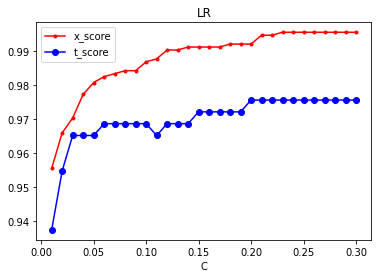

In [ ]:
# LogisticRegressionで分類
max_score = 0
LR_model = None
max_c = 0
LR_scores = []

# LogisticRegressionは特徴量を標準化する
LR_sc = StandardScaler()
sc_x_train = LR_sc.fit_transform(x_train)

# Warning回避のおまじない（DataFrameからSeriesにする）
series_y_train = y_train.loc[:, 'target']

num = 30
for i in range(num):
  c_val = (i+1)/100
  model = LogisticRegression(random_state=0, C=c_val, multi_class='auto', solver='lbfgs')
  x_score, t_score = learn(sc_x_train, series_y_train, model)
  LR_scores.append( {'C': c_val, 'x_score': x_score, 't_score': t_score} )
  if t_score > max_score:
    max_score = t_score
    LR_model = model
    max_c = c_val
  print(f"C: {c_val:.2f} ... x_score: {x_score:.3f}, t_score: {t_score:.3f}")

print()
print(f"C = {max_c}で、正解率が{max_score:.3f}となる")

# 学習の度合いをグラフで表示
plot_progress(LR_scores, title='LR')


max_depth:  1 ... x_score: 0.729, t_score: 0.715
max_depth:  2 ... x_score: 0.844, t_score: 0.830
max_depth:  3 ... x_score: 0.901, t_score: 0.885
max_depth:  4 ... x_score: 0.946, t_score: 0.924
max_depth:  5 ... x_score: 0.969, t_score: 0.944
max_depth:  6 ... x_score: 0.990, t_score: 0.972
max_depth:  7 ... x_score: 0.999, t_score: 0.976
max_depth:  8 ... x_score: 1.000, t_score: 0.979
max_depth:  9 ... x_score: 1.000, t_score: 0.976
max_depth: 10 ... x_score: 1.000, t_score: 0.986
max_depth: 11 ... x_score: 1.000, t_score: 0.986
max_depth: 12 ... x_score: 1.000, t_score: 0.983
max_depth: 13 ... x_score: 1.000, t_score: 0.983
max_depth: 14 ... x_score: 1.000, t_score: 0.979
max_depth: 15 ... x_score: 1.000, t_score: 0.979
max_depth: 16 ... x_score: 1.000, t_score: 0.979
max_depth: 17 ... x_score: 1.000, t_score: 0.979
max_depth: 18 ... x_score: 1.000, t_score: 0.979
max_depth: 19 ... x_score: 1.000, t_score: 0.979
max_depth: 20 ... x_score: 1.000, t_score: 0.979

max_depth = 10で、正解率

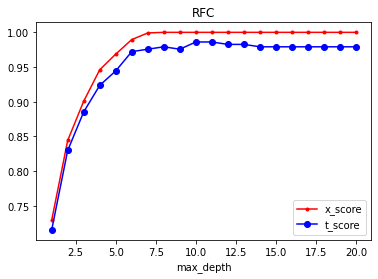

In [ ]:
# RandomForestClassfierで分類
max_score = 0
RFC_model = None
max_depth = 0
RFC_scores = []

# Warning回避のおまじない（DataFrameからSeriesにする）
series_y_train = y_train.loc[:, 'target']

num=20
for i in range(num):
  model = RandomForestClassifier(max_depth = i+1, n_estimators=200, random_state = 0)
  x_score, t_score = learn(x_train, series_y_train, model)
  RFC_scores.append( {'max_depth': i+1, 'x_score': x_score, 't_score': t_score} )
  if t_score > max_score:
    max_score = t_score
    RFC_model = model
    max_depth = i+1
  print(f"max_depth: {i+1:2} ... x_score: {x_score:.3f}, t_score: {t_score:.3f}")

print()
print(f"max_depth = {max_depth}で、正解率が{max_score:.3f}となる")

# 学習の度合いをグラフで表示
plot_progress(RFC_scores, title='RFC')

３つのモデルを比較

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36611 missing from current font.
  font.set_text(s, 0, flags=flags)


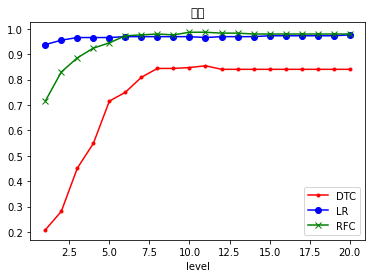

In [ ]:
tmp = pd.concat([
                 pd.DataFrame(DTC_scores).loc[:, ['max_depth', 't_score']],
                 pd.DataFrame(LR_scores).loc[:, ['t_score']],
                 pd.DataFrame(RFC_scores).loc[:, ['t_score']],
                ], axis=1)
tmp.columns = ['level', 'DTC', 'LR', 'RFC']
tmp.plot.line(x=tmp.columns[0], style=['r.-', 'bo-', 'gx-'], title='比較')

以上により、もっとも精度が良いモデルが「ランダムフォレスト」であり<br>
「ロジスティック回帰」は早い段階で精度が収束することが分かった。

もっとも精度の悪かった決定木でアダブーストを行うことにする

n_estimators:   50 ... x_score: 0.780, t_score: 0.740
n_estimators:  100 ... x_score: 0.864, t_score: 0.785
n_estimators:  150 ... x_score: 0.886, t_score: 0.812
n_estimators:  200 ... x_score: 0.949, t_score: 0.882
n_estimators:  250 ... x_score: 0.980, t_score: 0.892
n_estimators:  300 ... x_score: 0.983, t_score: 0.899
n_estimators:  350 ... x_score: 0.989, t_score: 0.906
n_estimators:  400 ... x_score: 0.990, t_score: 0.924
n_estimators:  450 ... x_score: 0.995, t_score: 0.931
n_estimators:  500 ... x_score: 0.994, t_score: 0.920
n_estimators:  550 ... x_score: 0.997, t_score: 0.913
n_estimators:  600 ... x_score: 0.997, t_score: 0.927
n_estimators:  650 ... x_score: 0.997, t_score: 0.920
n_estimators:  700 ... x_score: 0.998, t_score: 0.920
n_estimators:  750 ... x_score: 0.997, t_score: 0.934
n_estimators:  800 ... x_score: 1.000, t_score: 0.924
n_estimators:  850 ... x_score: 0.999, t_score: 0.927
n_estimators:  900 ... x_score: 0.999, t_score: 0.931
n_estimators:  950 ... x_sco

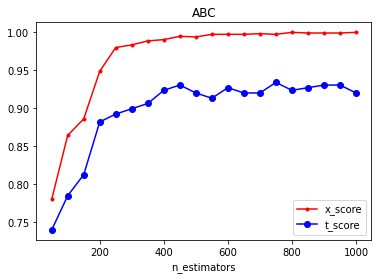

In [ ]:
# AdaBoostClassfierで分類
max_score = 0
ABC_model = None
max_n_estimators = 0
ABC_scores = []

# Warning回避のおまじない（DataFrameからSeriesにする）
series_y_train = y_train.loc[:, 'target']

num=20
for i in range(num):
  n_estimators = 50*(i+1)
  model = AdaBoostClassifier(n_estimators=n_estimators, random_state=0, base_estimator=DecisionTreeClassifier(max_depth = 3, random_state = 0))
  x_score, t_score = learn(x_train, series_y_train, model)
  ABC_scores.append( {'n_estimators': n_estimators, 'x_score': x_score, 't_score': t_score} )
  if t_score > max_score:
    max_score = t_score
    ABC_model = model
    max_n_estimators = n_estimators
  print(f"n_estimators: {n_estimators:4} ... x_score: {x_score:.3f}, t_score: {t_score:.3f}")

print()
print(f"n_estimators = {max_n_estimators}で、正解率が{max_score:.3f}となる")

# 学習の度合いをグラフで表示
plot_progress(ABC_scores, title='ABC')

決定木の深さが3でもよい精度を出すことができた

最後にテストデータを用いて検証を行う

In [ ]:
x_test = test.loc[:, x_col]
y_test = test.loc[:, [t_col]]


# 特徴量を標準化する
sc_x_test = LR_sc.fit_transform(x_test)

# Warning回避のおまじない（DataFrameからSeriesにする）
series_y_test = y_test.loc[:, 'target']


In [ ]:
x_test.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1081,0,0,11,16,15,3,0,0,0,5,...,1,0,0,0,13,13,8,13,16,8
1707,0,1,15,14,2,0,0,0,0,6,...,0,0,0,1,15,16,12,1,0,0
927,0,2,13,16,10,0,0,0,0,12,...,6,0,0,1,13,16,16,16,16,3
713,0,0,9,7,0,0,0,0,0,0,...,11,0,0,0,7,14,16,12,1,0
262,0,0,3,13,6,0,0,0,0,0,...,11,0,0,0,3,13,15,8,0,0


In [ ]:
y_test.head()

,target
1081,2
1707,8
927,2
713,6
262,6


In [ ]:
# DecisionTreeClassfierでテスト
print(f"DTC ... {DTC_model.score(x_test, y_test):.5f}")


# LogisticRegressionでテスト
print(f"LR  ... {LR_model.score(sc_x_test, series_y_test):.5f}")


# RandomForestClassfierでテスト
print(f"RFC ... {RFC_model.score(x_test, series_y_test):.5f}")


# AdaBoostClassfierで分類
print(f"ABC ... {ABC_model.score(x_test, series_y_test):.5f}")

DTC ... 0.81389
LR  ... 0.96389
RFC ... 0.97222
ABC ... 0.90833


以上により、もっとも精度の良い分類方法は「ランダムフォレスト」となる

In [ ]:
# モデルの保存
with open('digits_DTC.pkl', 'wb') as f:
  pickle.dump(DTC_model, f)
with open('digits_LR_sc.pkl', 'wb') as f:
  pickle.dump(LR_sc, f)
with open('digits_LR.pkl', 'wb') as f:
  pickle.dump(LR_model, f)
with open('digits_RFC.pkl', 'wb') as f:
  pickle.dump(RFC_model, f)
with open('digits_ABC.pkl', 'wb') as f:
  pickle.dump(ABC_model, f)

<h2>おまけ</h2>
２値化を行ってから学習を行う

In [ ]:
df1 = df0.copy()
for i in df1.index:
  m = df1.loc[i, x_col]
  # 画素の中央値を閾値とする
  th = (m.max() - m.min()) / 2
  m[m < th] = 0
  m[m >= th] = 1
  df1.loc[i, x_col] = m
df1.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,2
3,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,3
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4


[[[0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0]], [[0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0]], [[0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0]], [[0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 1, 1, 0, 0]], [[0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0], [0

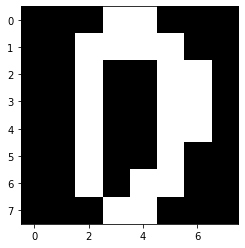

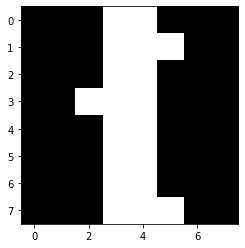

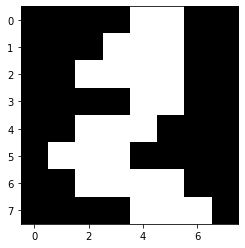

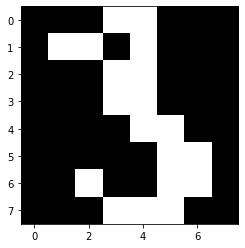

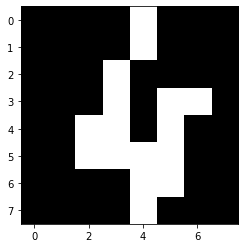

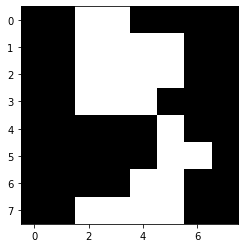

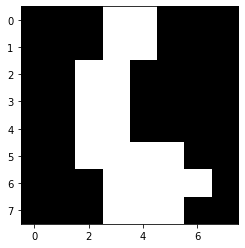

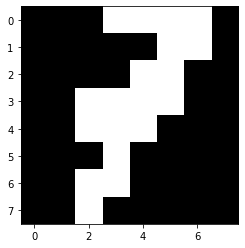

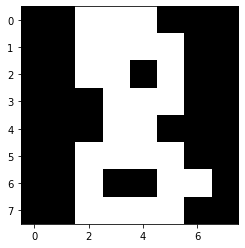

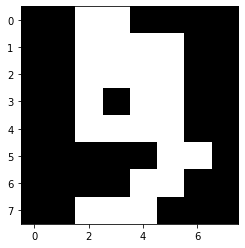

In [ ]:
# 画像番号x行x列の形に変換
tmp = [[list(df1.loc[i, x_col[j*8]:x_col[(j+1)*8-1]]) for j in range(8)] for i in range(10)]
print(tmp)
for i in range(10):
  plt.imshow(tmp[i], cmap='gray')
  plt.show()

max_depth:  1 ... x_score: 0.207, t_score: 0.170
max_depth:  2 ... x_score: 0.371, t_score: 0.347
max_depth:  3 ... x_score: 0.536, t_score: 0.510
max_depth:  4 ... x_score: 0.667, t_score: 0.622
max_depth:  5 ... x_score: 0.778, t_score: 0.760
max_depth:  6 ... x_score: 0.846, t_score: 0.760
max_depth:  7 ... x_score: 0.901, t_score: 0.830
max_depth:  8 ... x_score: 0.952, t_score: 0.858
max_depth:  9 ... x_score: 0.977, t_score: 0.865
max_depth: 10 ... x_score: 0.992, t_score: 0.868
max_depth: 11 ... x_score: 0.998, t_score: 0.868
max_depth: 12 ... x_score: 0.999, t_score: 0.865
max_depth: 13 ... x_score: 0.999, t_score: 0.868
max_depth: 14 ... x_score: 1.000, t_score: 0.865
max_depth: 15 ... x_score: 1.000, t_score: 0.865
max_depth: 16 ... x_score: 1.000, t_score: 0.865
max_depth: 17 ... x_score: 1.000, t_score: 0.865
max_depth: 18 ... x_score: 1.000, t_score: 0.865
max_depth: 19 ... x_score: 1.000, t_score: 0.865
max_depth: 20 ... x_score: 1.000, t_score: 0.865

max_depth = 10で、正解率

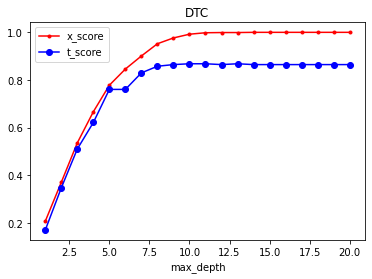

In [ ]:
# 訓練データ・検証データ、テストデータに分割
train_val, test = train_test_split(df1, test_size = 0.2, random_state = 0)
x_train = train_val.loc[:, x_col]
y_train = train_val.loc[:, [t_col]]

# DecisionTreeClassfierで分類
max_score = 0
DTC_model2 = None
max_depth = 0
DTC_scores2 = []

for i in range(20):
  model = DecisionTreeClassifier(max_depth = i+1, random_state = 0)
  x_score, t_score = learn(x_train, y_train, model)
  DTC_scores2.append( {'max_depth': i+1, 'x_score': x_score, 't_score': t_score} )
  if t_score > max_score:
    max_score = t_score
    DTC_model2 = model
    max_depth = i+1
  print(f"max_depth: {i+1:2} ... x_score: {x_score:.3f}, t_score: {t_score:.3f}")

print()
print(f"max_depth = {max_depth}で、正解率が{max_score:.3f}となる")

# 学習の度合いをグラフで表示
tmp = pd.DataFrame(DTC_scores2)
tmp.plot.line(x=tmp.columns[0], style=['r.-', 'bo-'], title='DTC')

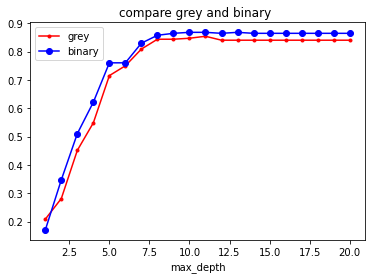

In [ ]:
# 2値化前後で比較
tmp = pd.concat([
                 pd.DataFrame(DTC_scores).loc[:, ['max_depth', 't_score']],
                 pd.DataFrame(DTC_scores2).loc[:, ['t_score']],
                ], axis=1)
tmp.columns = ['max_depth', 'grey', 'binary']
tmp.plot.line(x=tmp.columns[0], style=['r.-', 'bo-'], title='compare grey and binary ')

2値化をすることが精度を上げるための一つの手法であることが分かった